In [ ]:
import numpy as np
import pandas as pd

from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# вспомогательные функции для построения графиков

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , fill=True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_distribution_2(df, var, target):
    grid = sns.jointplot(x=df[var], y=df[target], kind='reg')
    grid.fig.set_figwidth(8)
    grid.fig.set_figheight(8)
    plt.show()

def plot_boxplot(df, var, target):
    plt.figure(figsize=(16, 8))
    sns.boxplot(x=df[target], y=df[var], whis=1.5)
    plt.show()

def plot_correlation_map( df ):
    corr = df.corr()
    corr = np.round(corr, 2)
    corr[np.abs(corr) < 0.3] = 0
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr,
        cmap = cmap,
        square=True,
        cbar_kws={ 'shrink' : .9 },
        ax=ax,
        annot = True,
        annot_kws = { 'fontsize' : 12 }
    )

In [ ]:
df = pd.read_csv('/content/winequalityN.csv')

In [ ]:
df.head(5)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [ ]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [ ]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

<ipython-input-2-3e1747ab591f>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


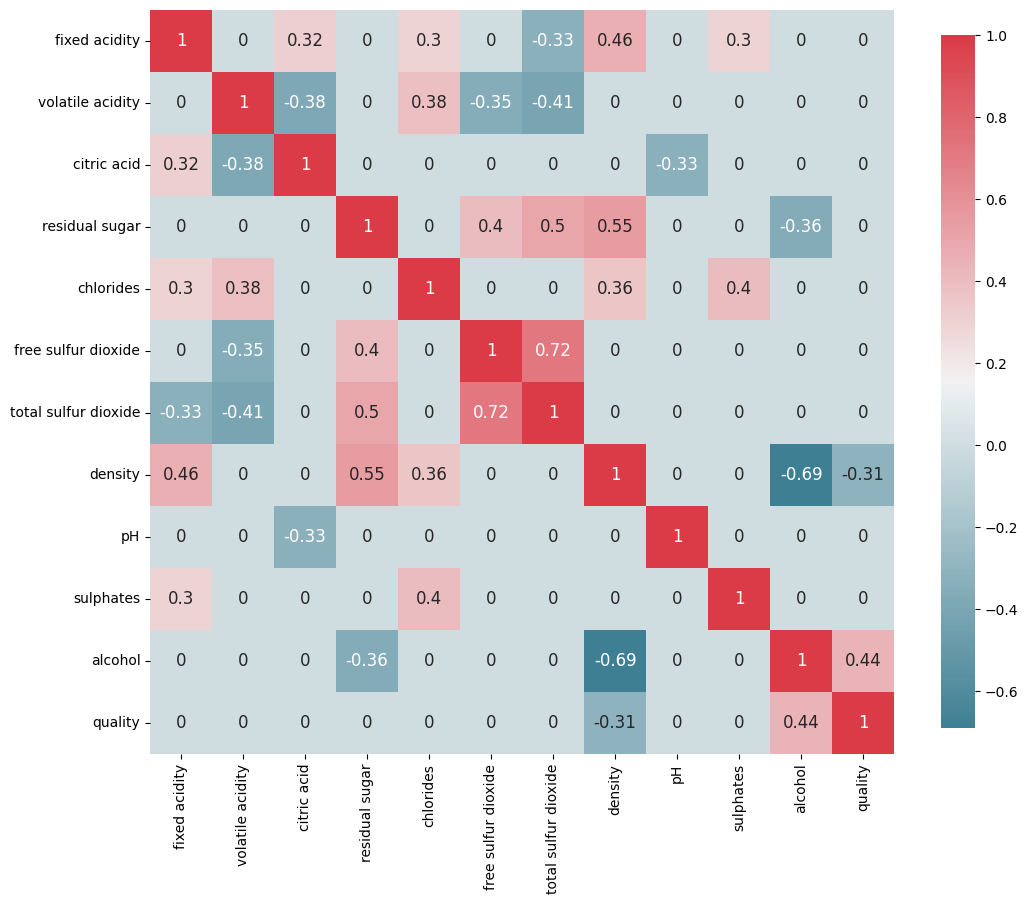

In [ ]:
## важные элементы подсвечиваются красным

plot_correlation_map(df)

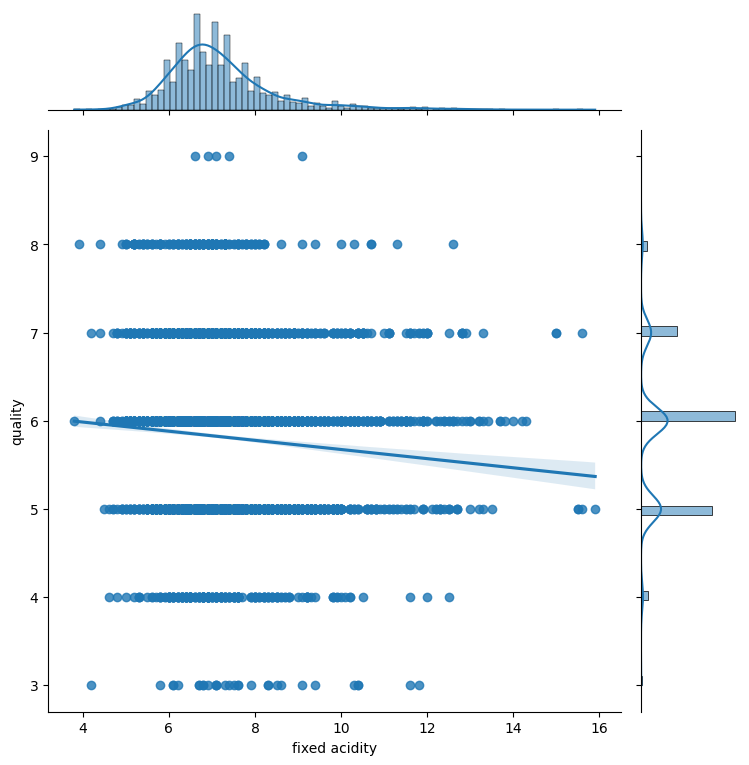

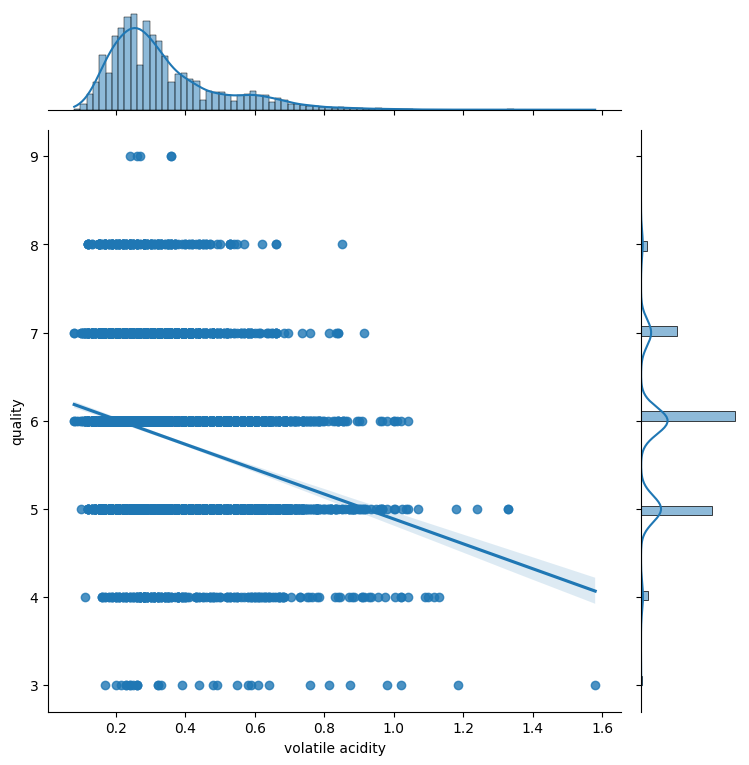

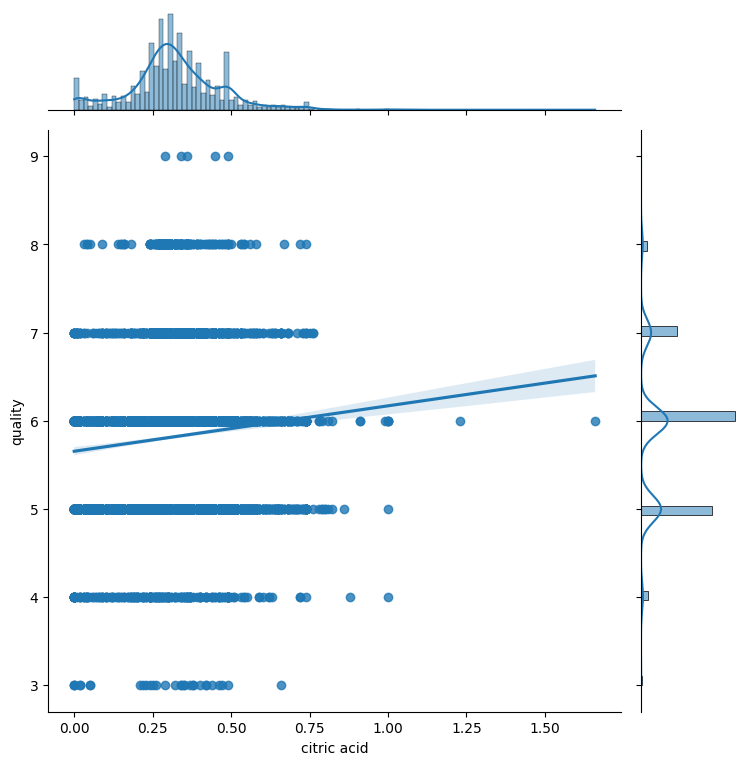

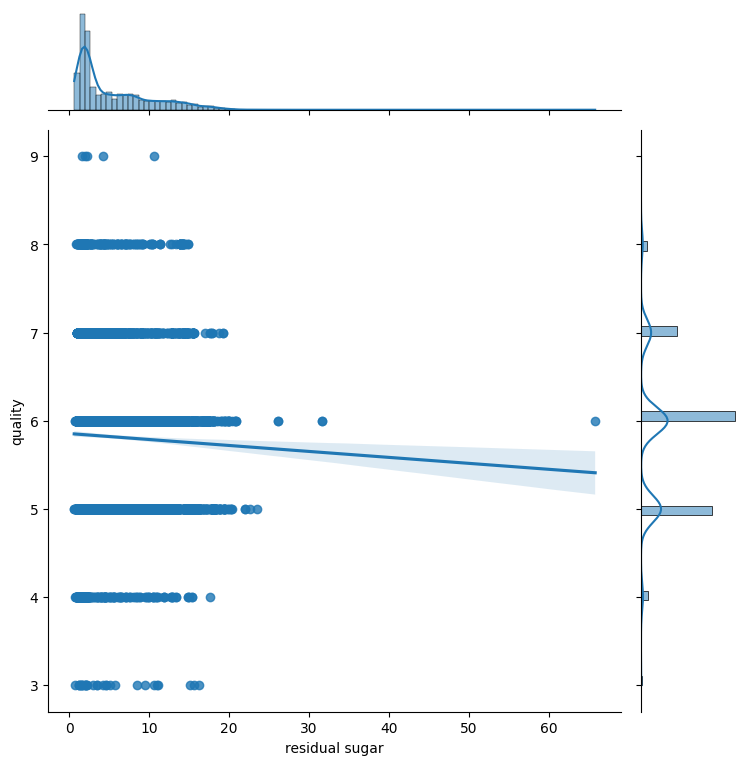

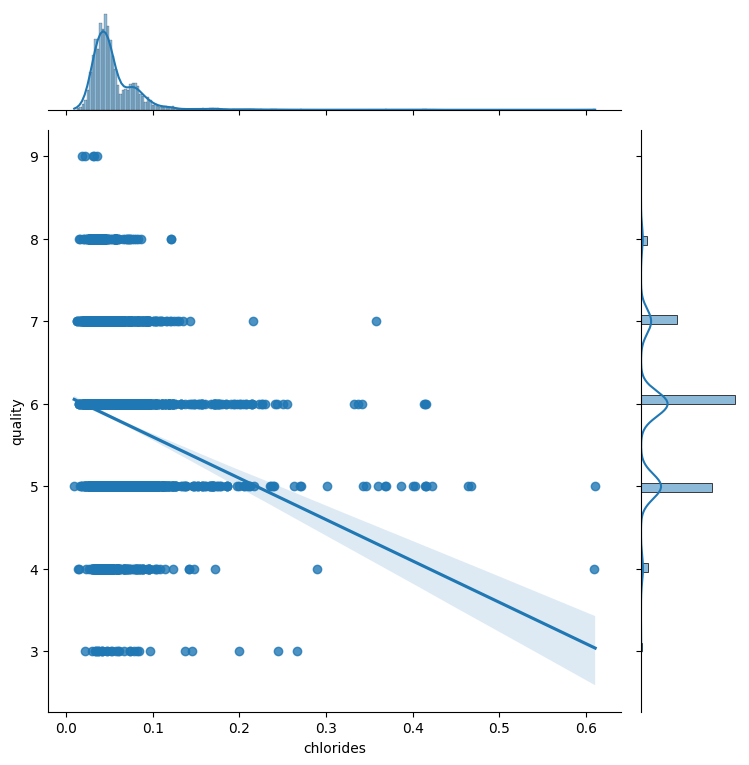

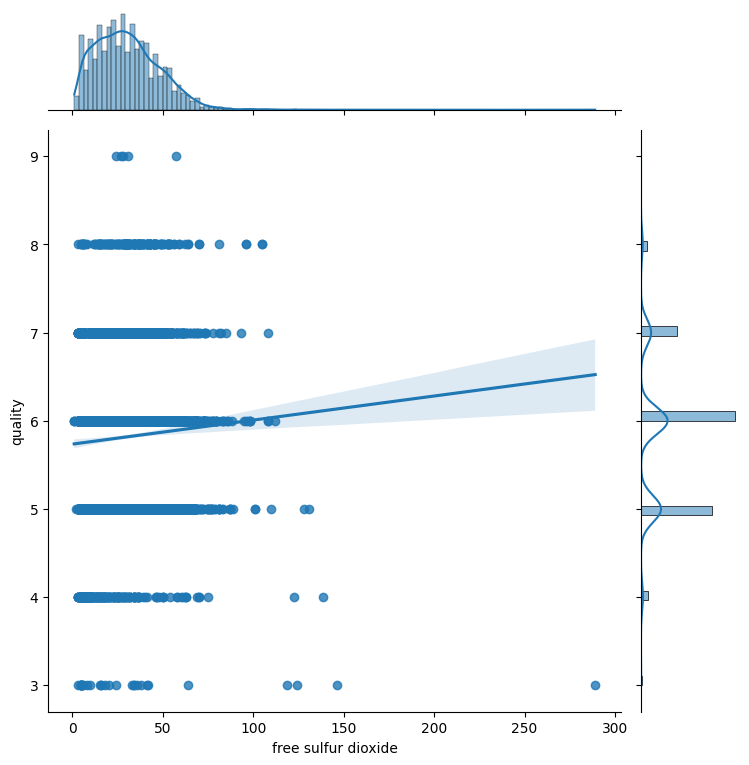

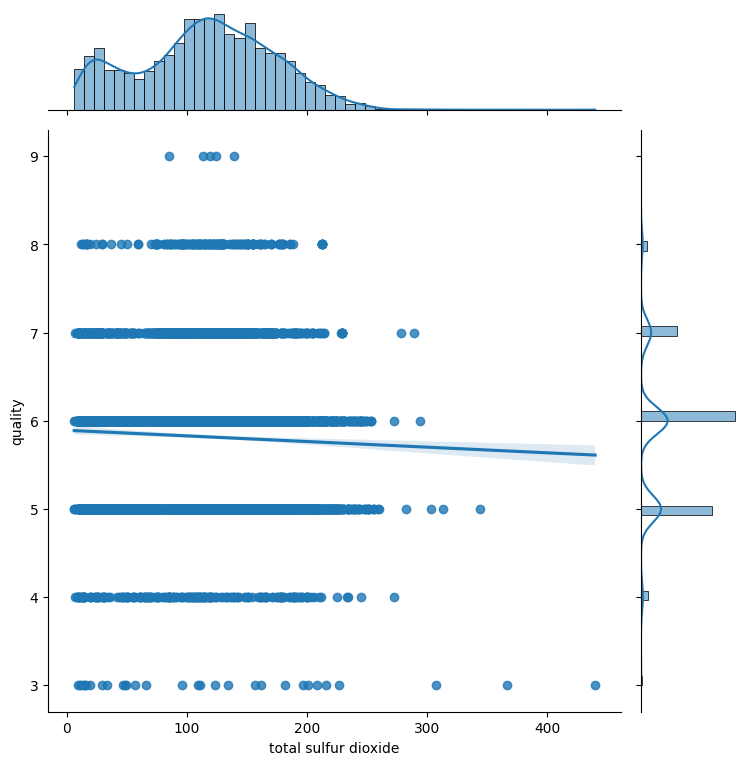

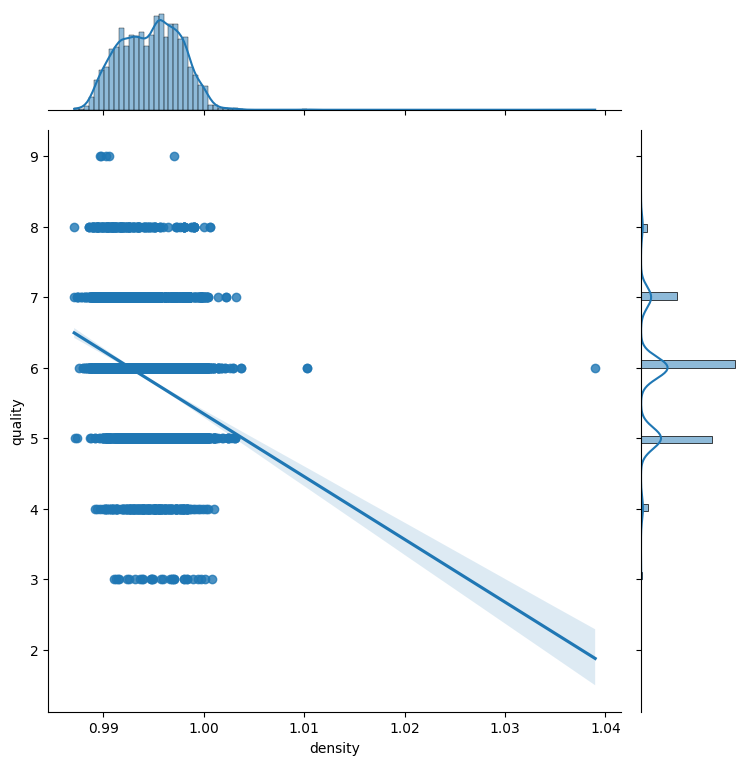

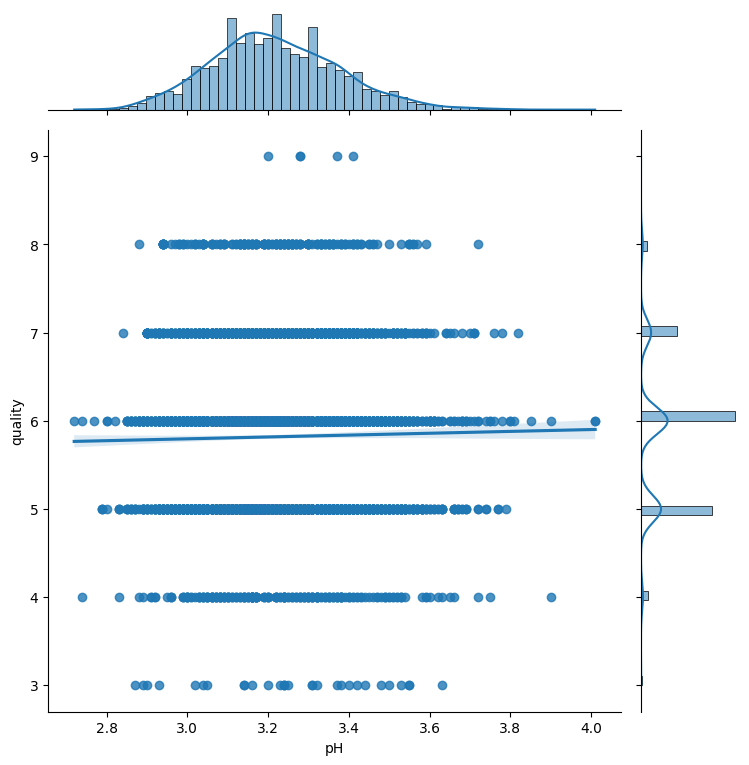

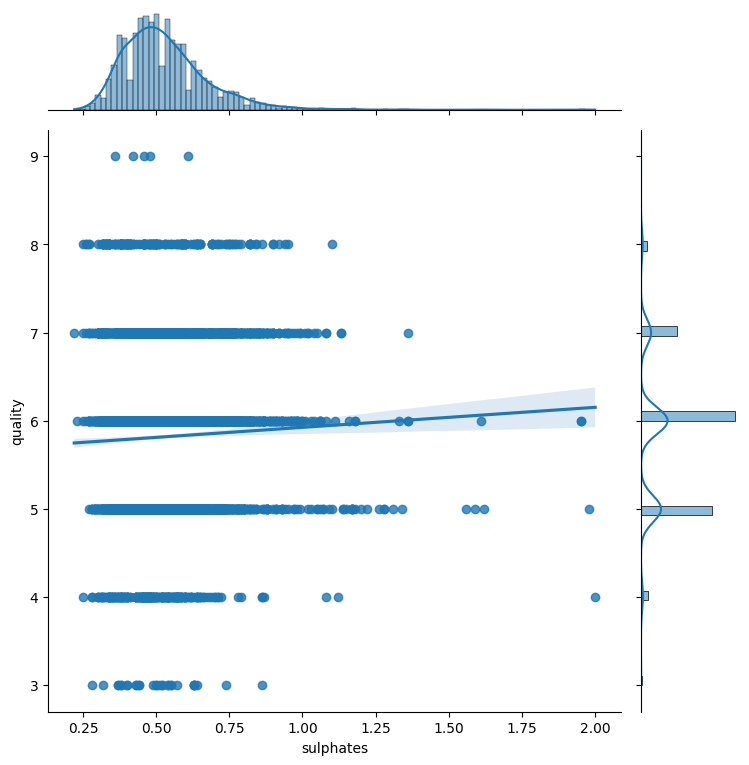

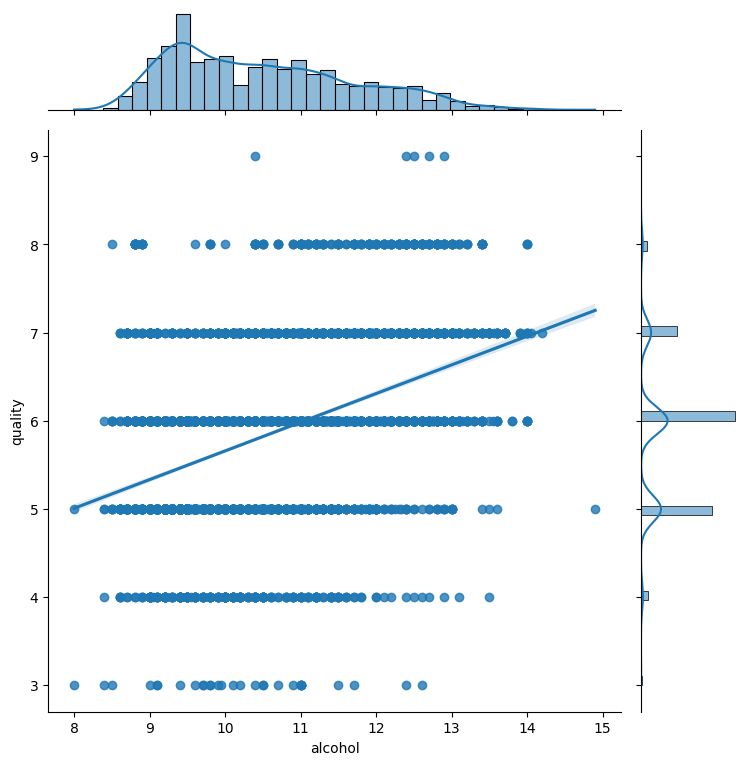

<Figure size 640x480 with 0 Axes>

In [ ]:
columns_to_plot = list(df.columns)[1:-1]
num_columns = len(columns_to_plot)

for i, col in enumerate(columns_to_plot):
    plot_distribution_2(df, var=col, target='quality')

plt.tight_layout()
plt.show()

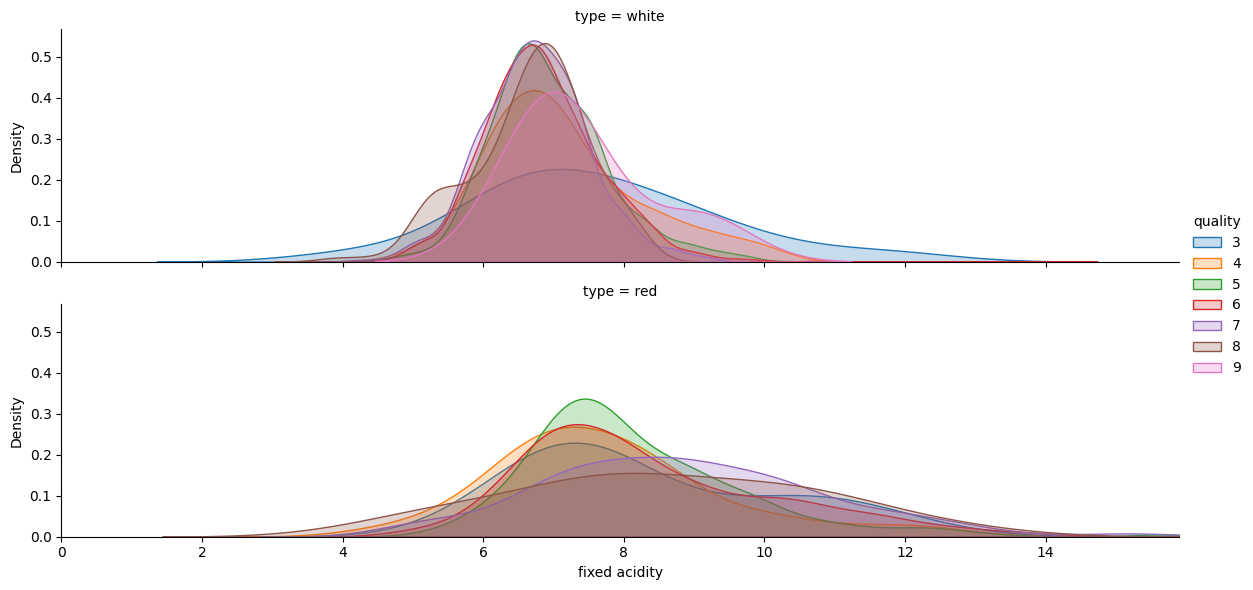

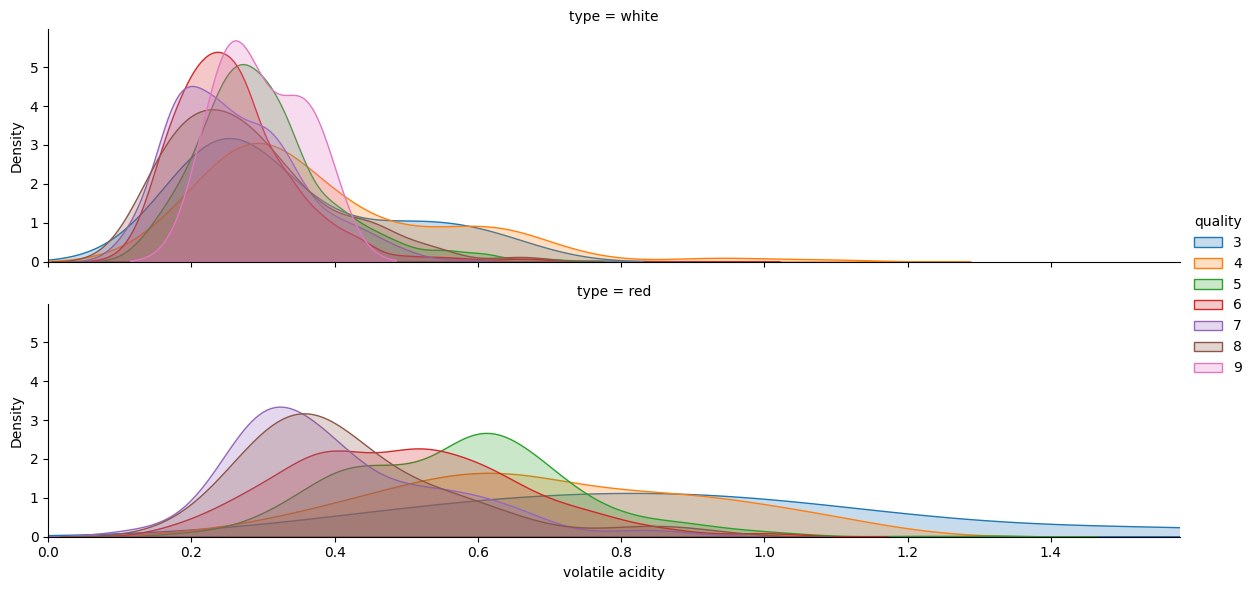

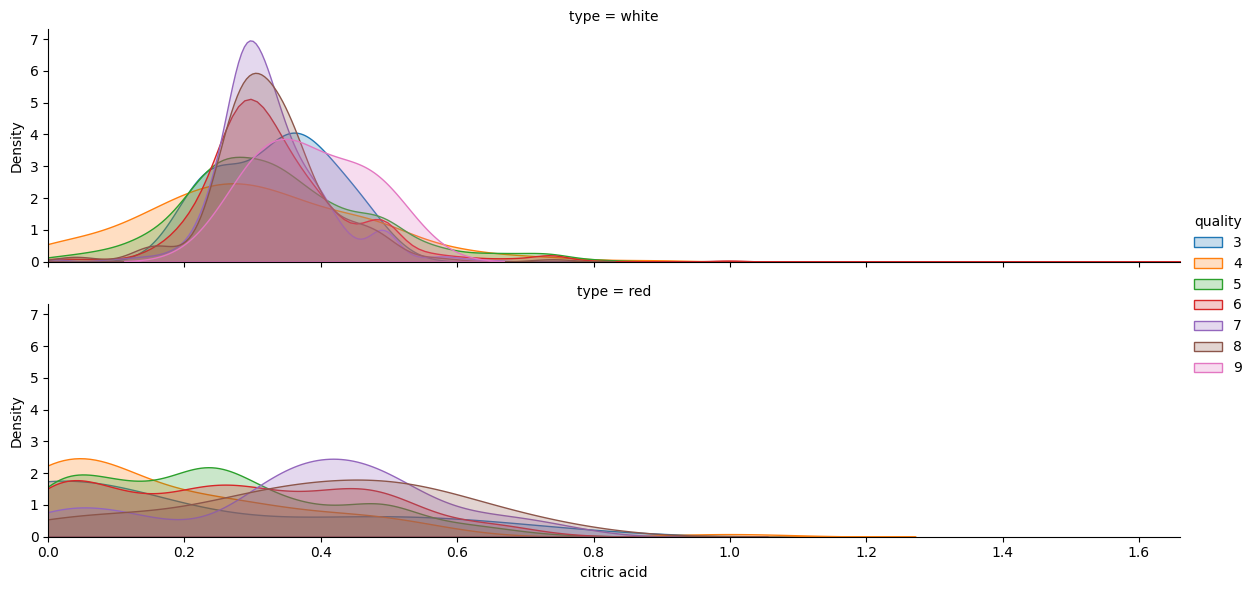

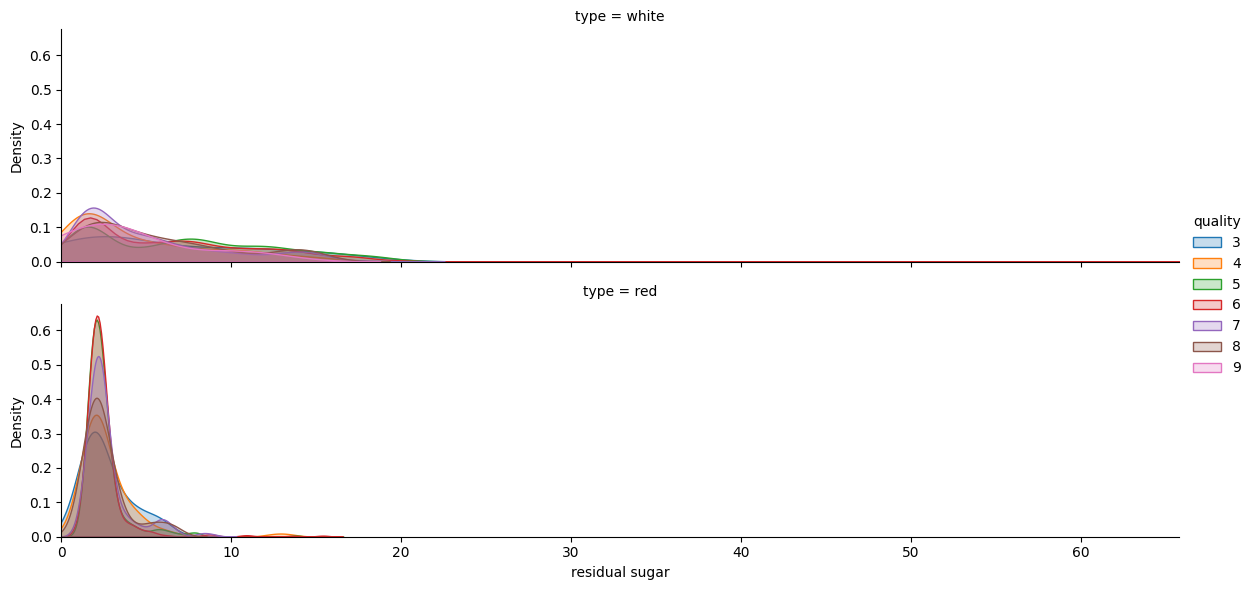

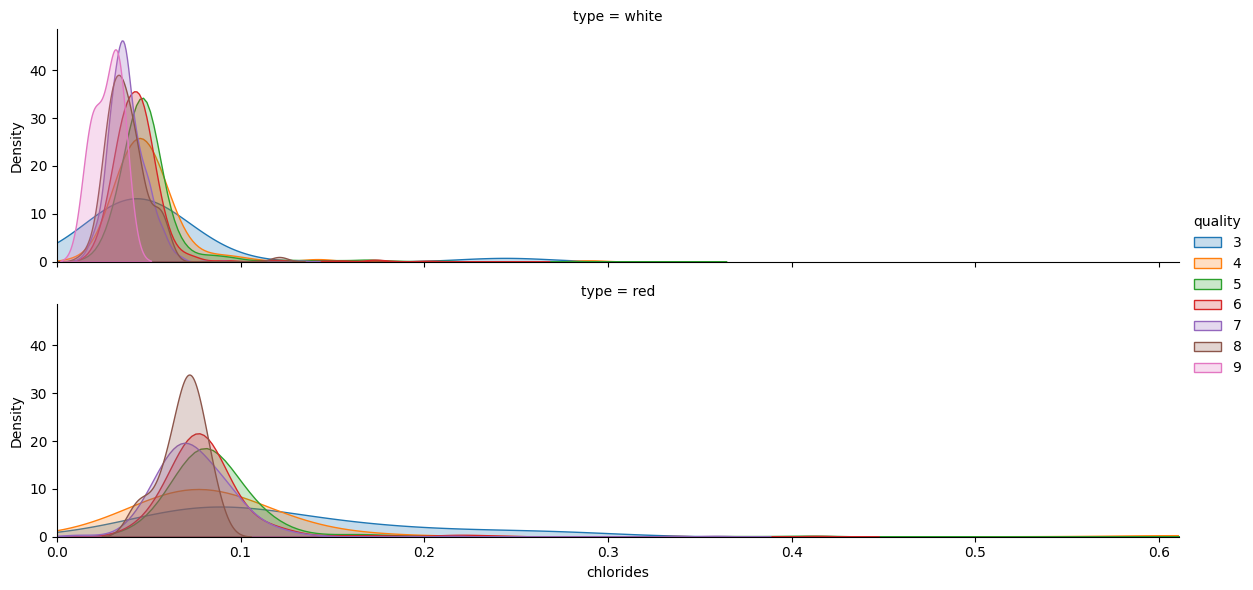

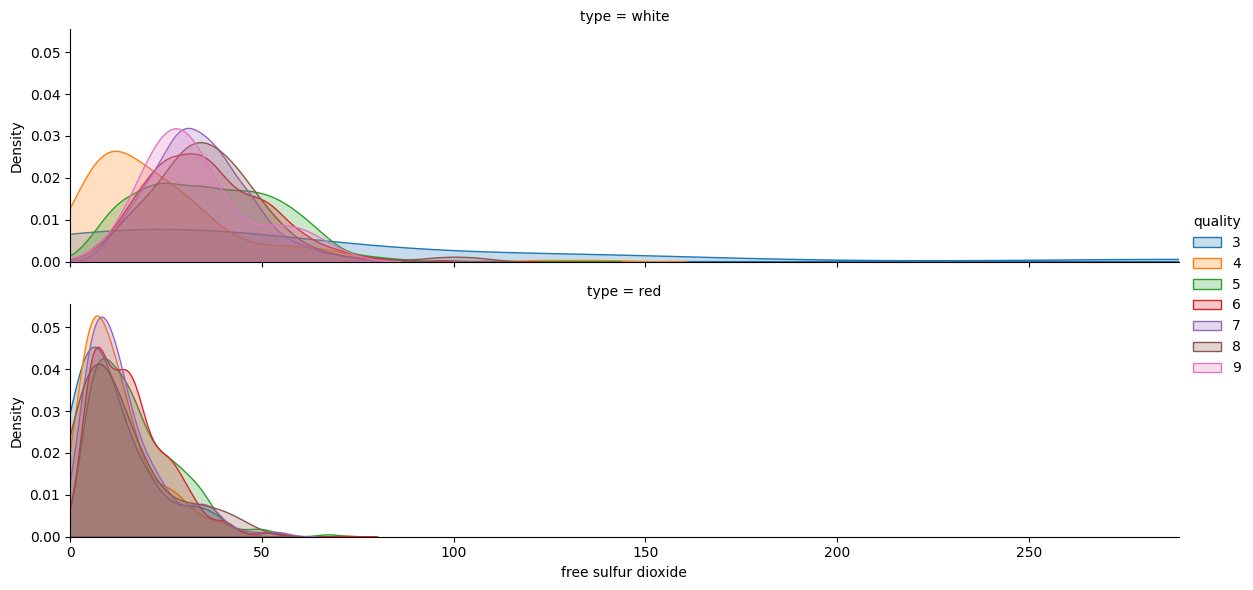

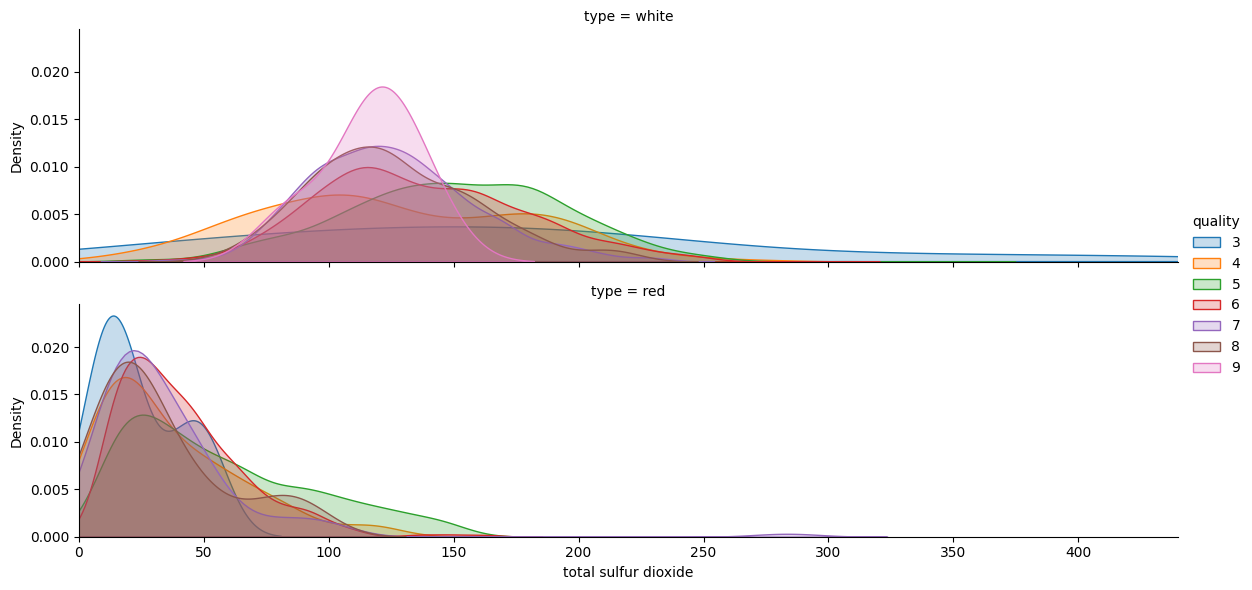

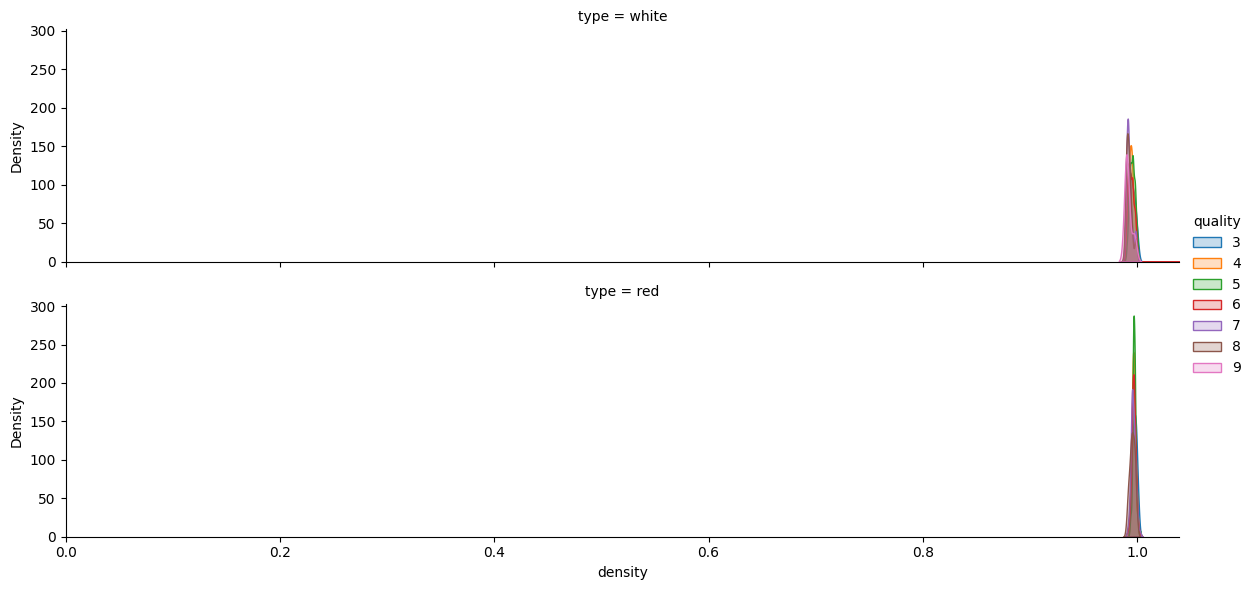

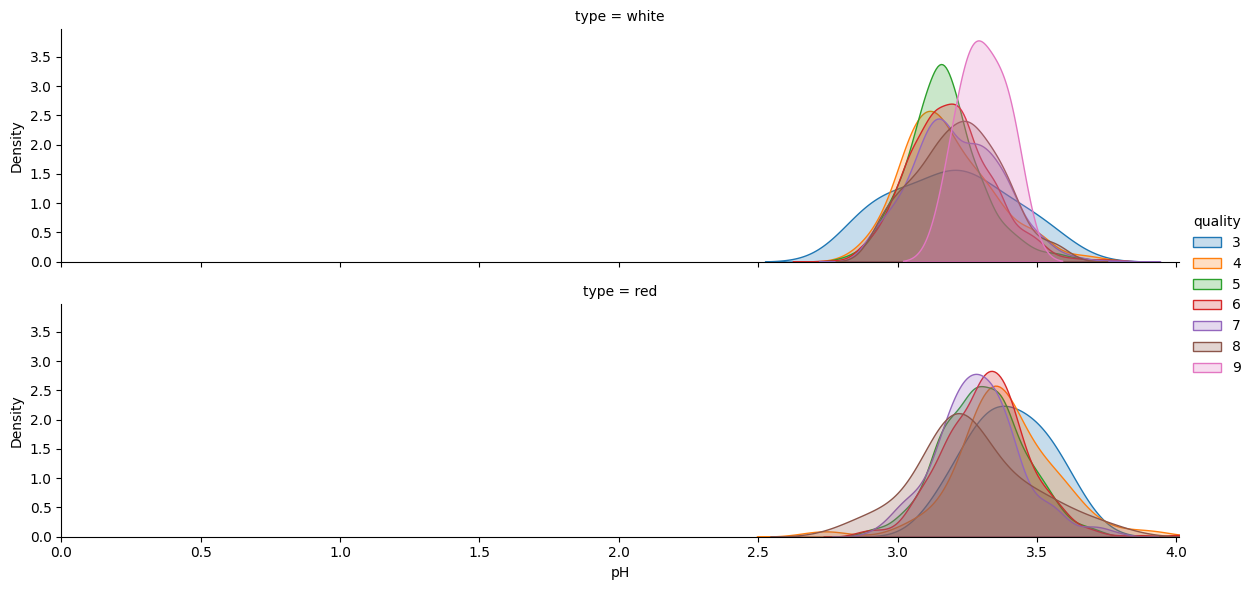

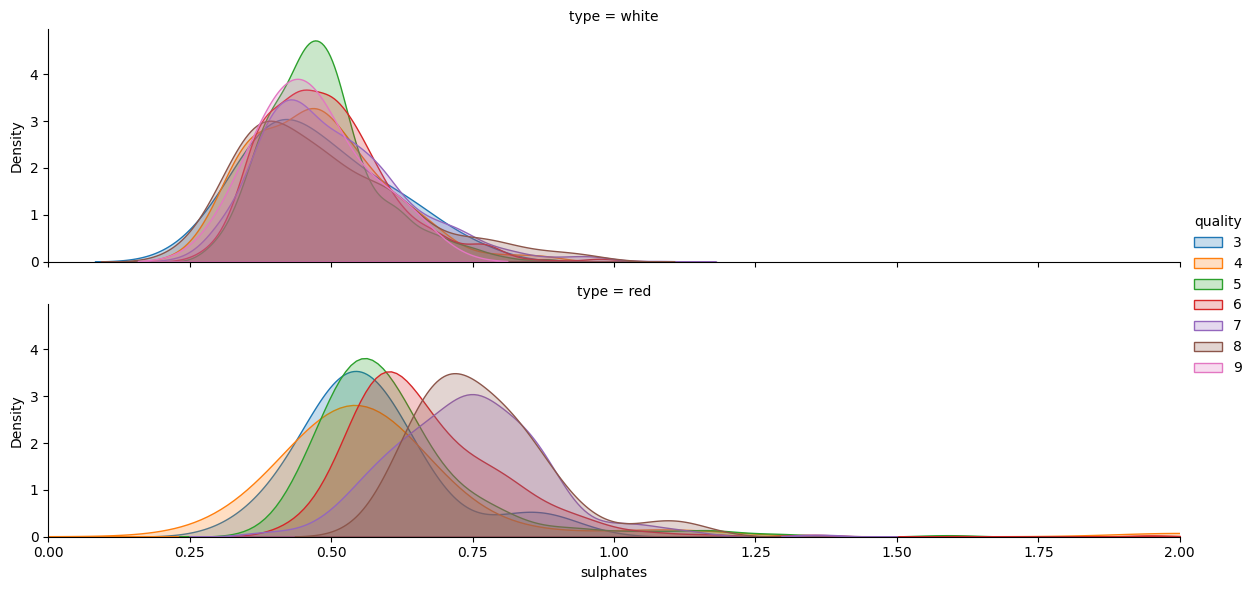

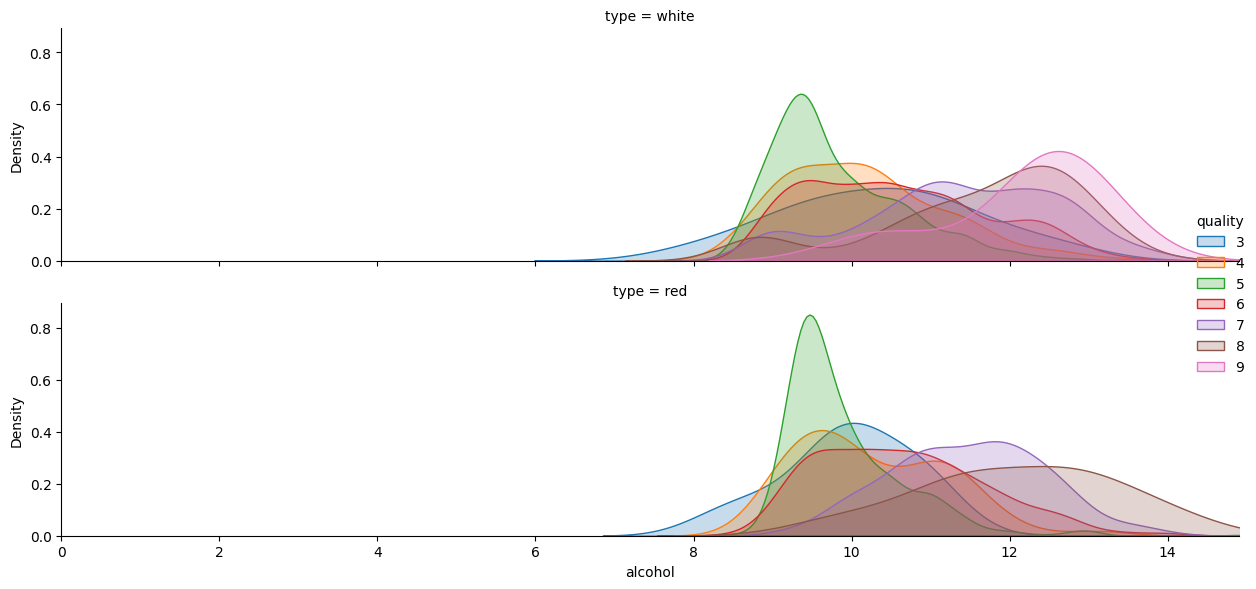

In [ ]:
for i, col in enumerate(columns_to_plot):
    plot_distribution(df, var=col, target='quality', row = 'type')

plt.tight_layout()
plt.show()

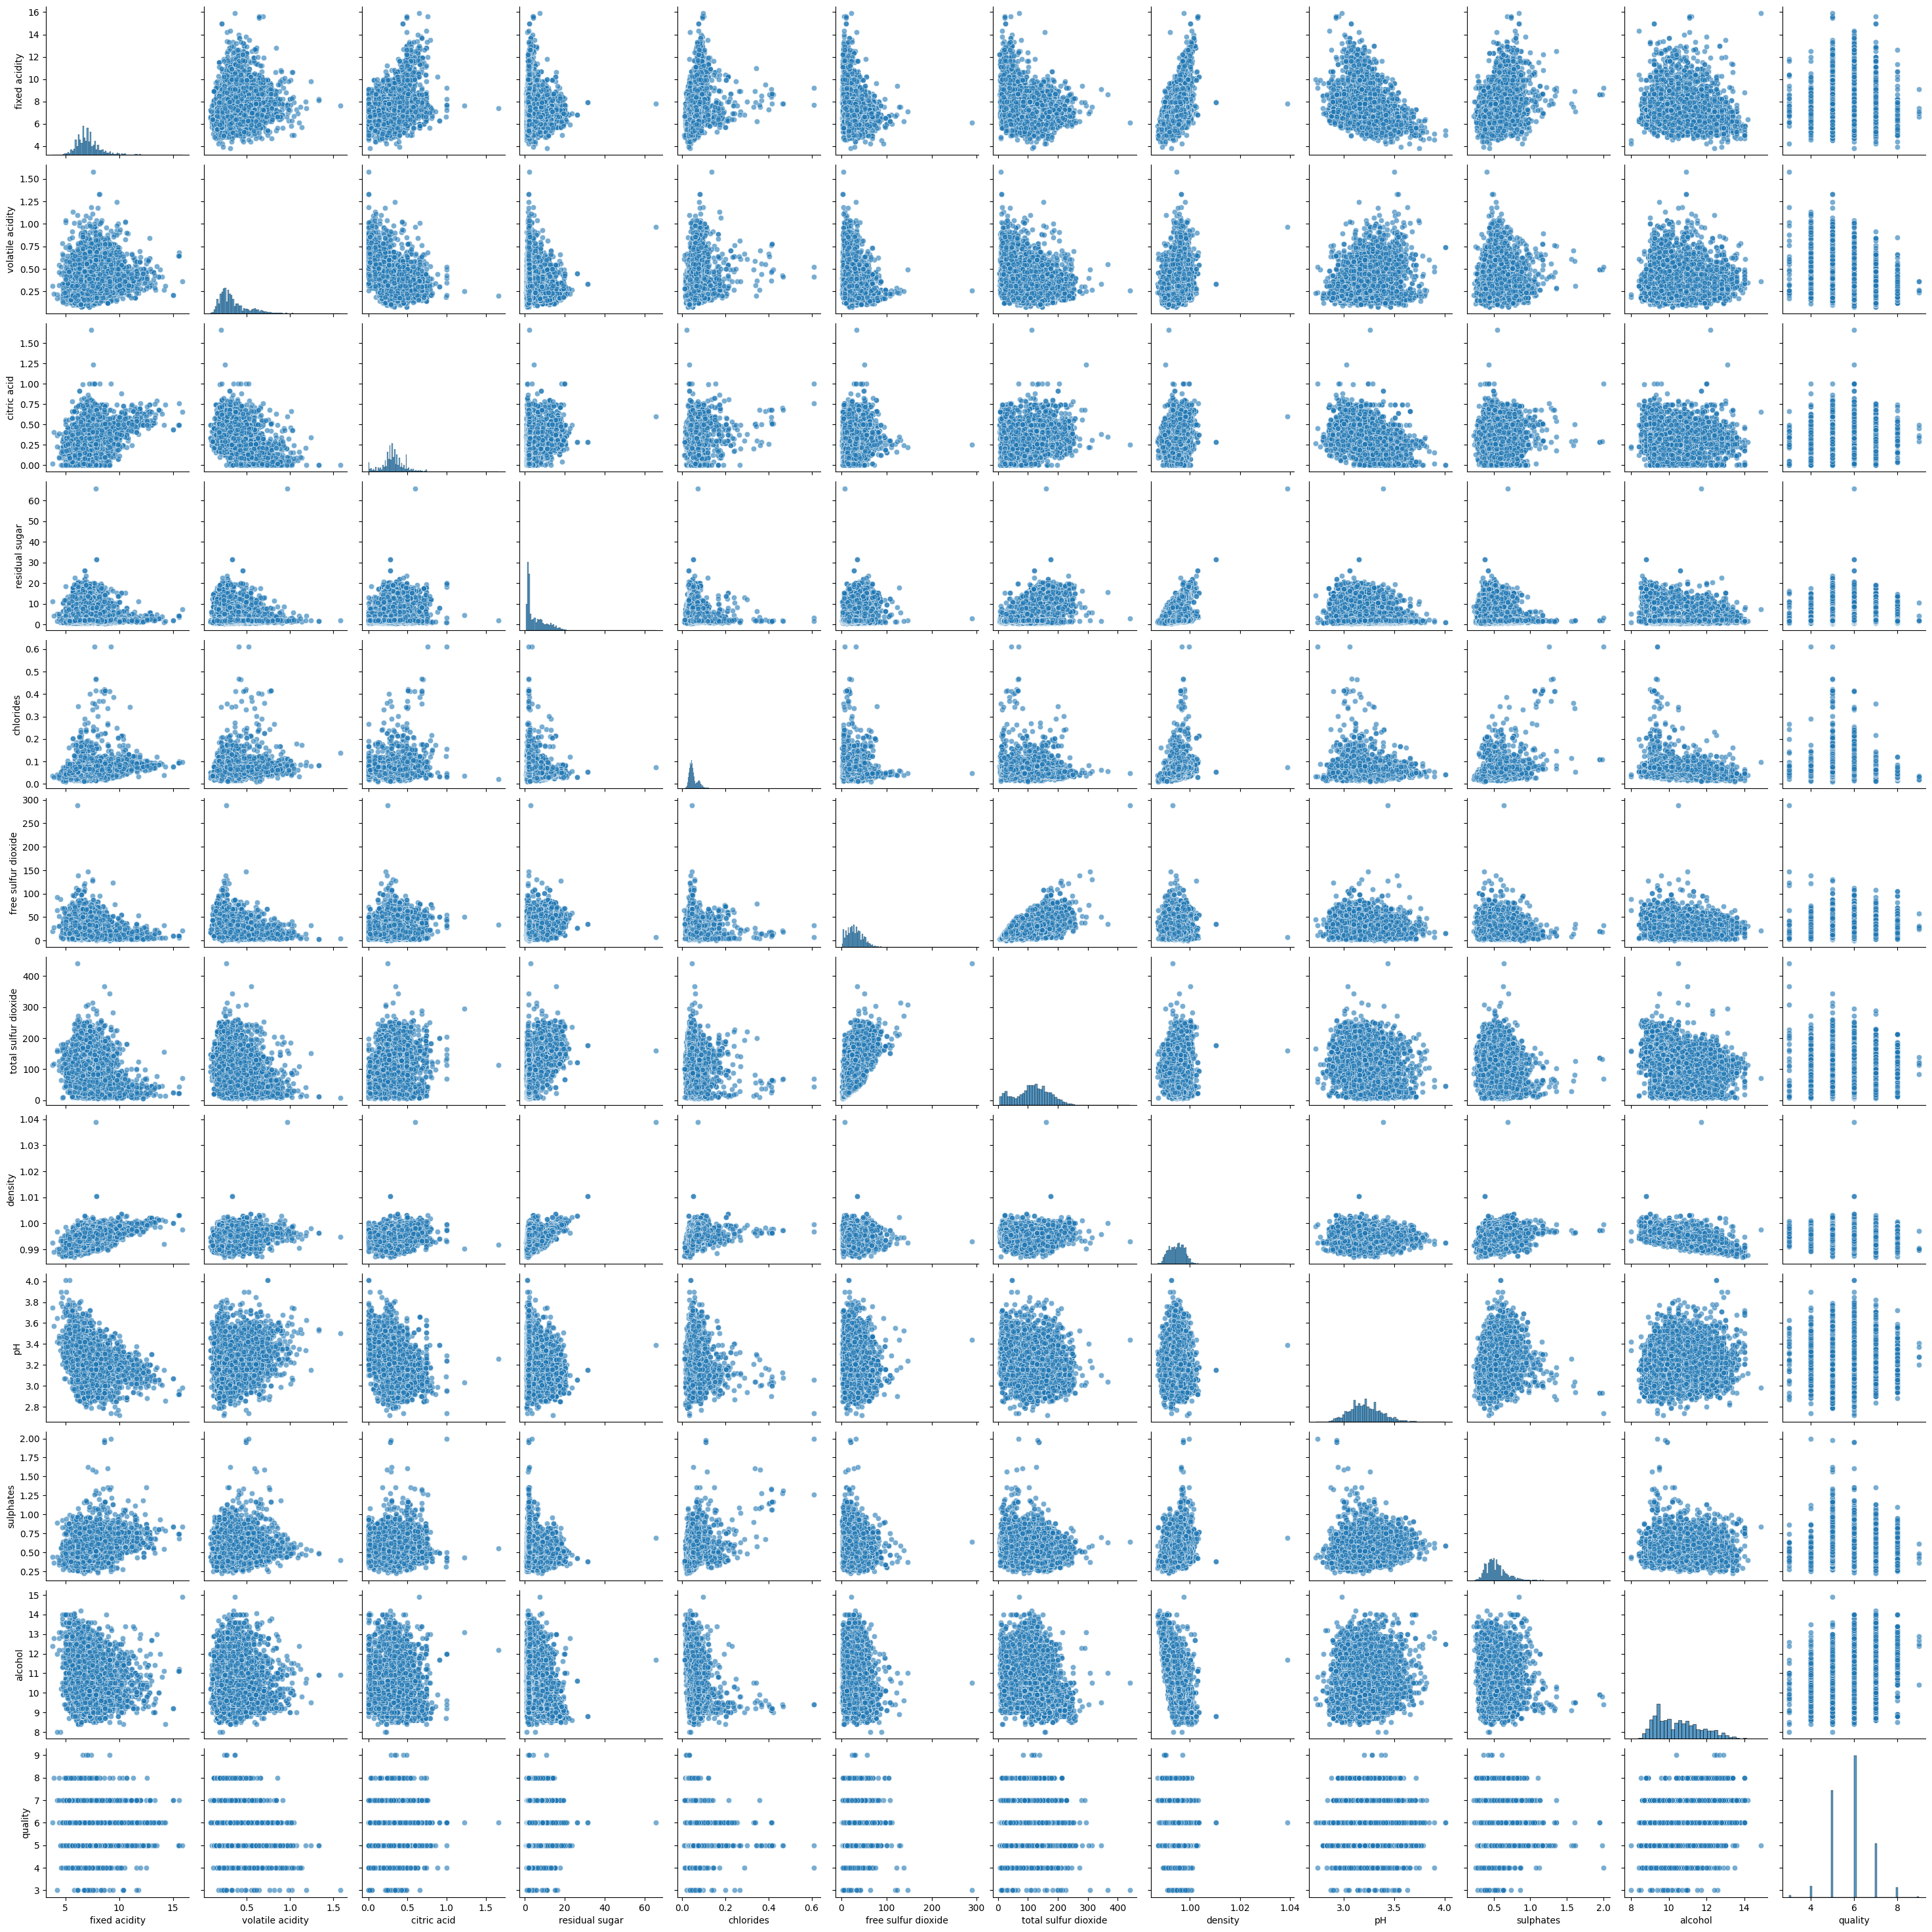

In [ ]:
sns.pairplot(df, plot_kws={'alpha': 0.6});

In [ ]:
list(df.columns)[1:-1]

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

1 - фиксированная кислотность

2 - летучая кислотность

3 - лимонная кислота

4 - глюкоза

5 - хлориды

6 - свободный диоксид серы

7 - общий диоксид серы

8 - плотность

9 - рН

10 - сульфаты

11 - % алкоголя

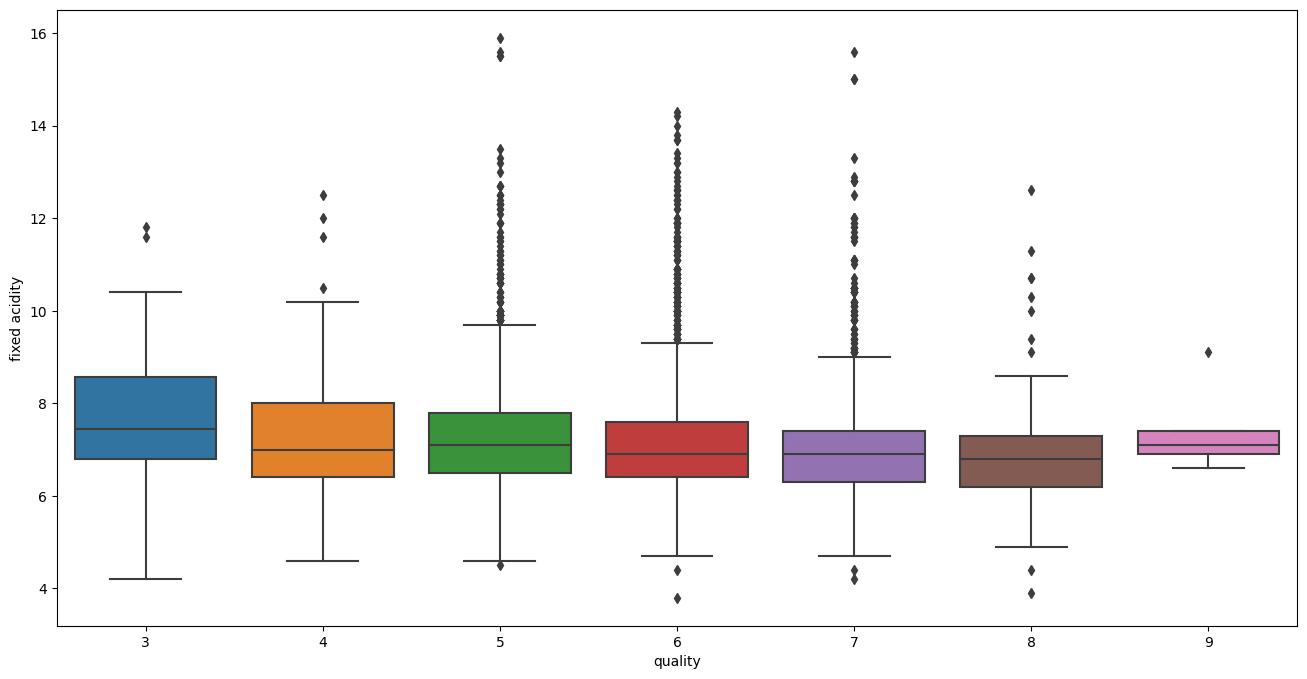

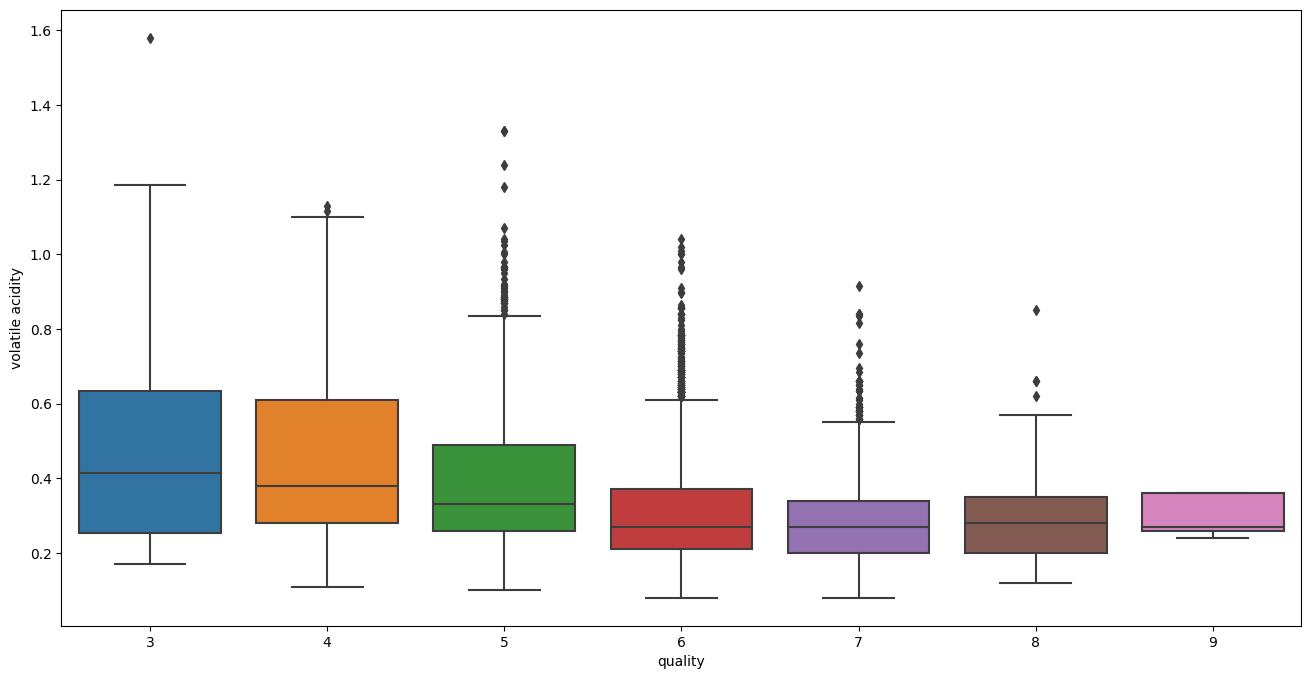

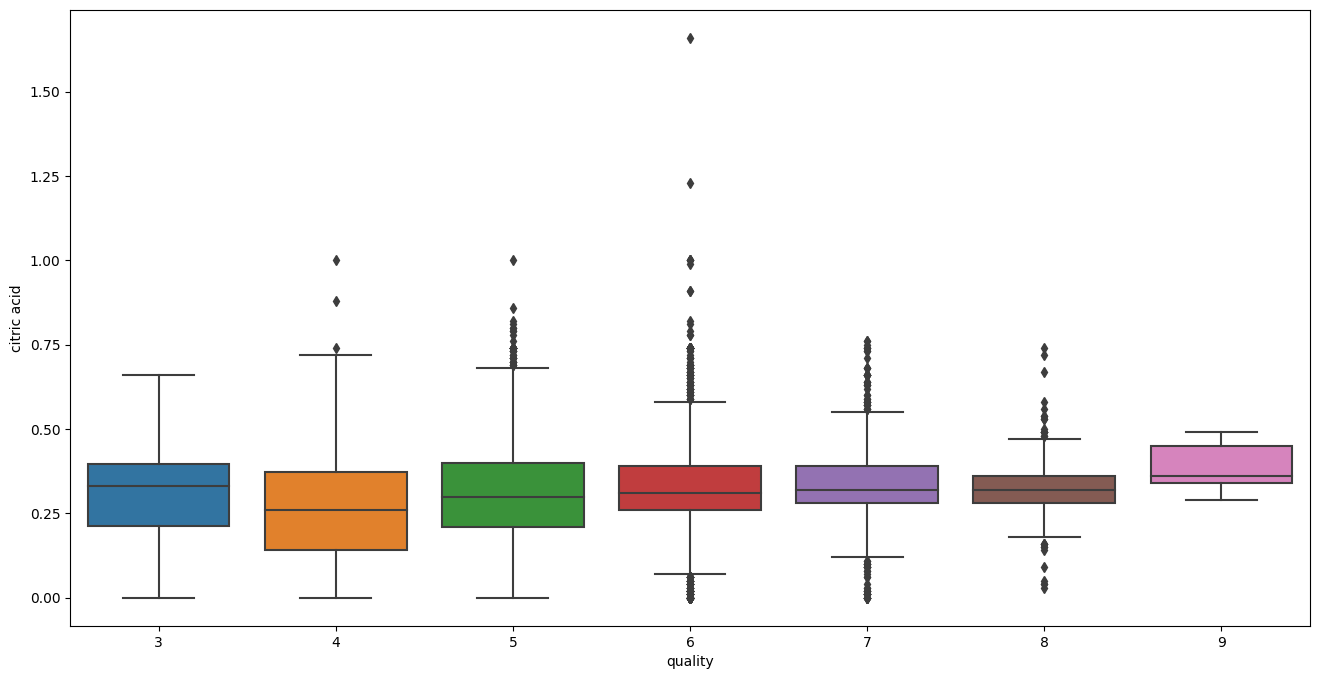

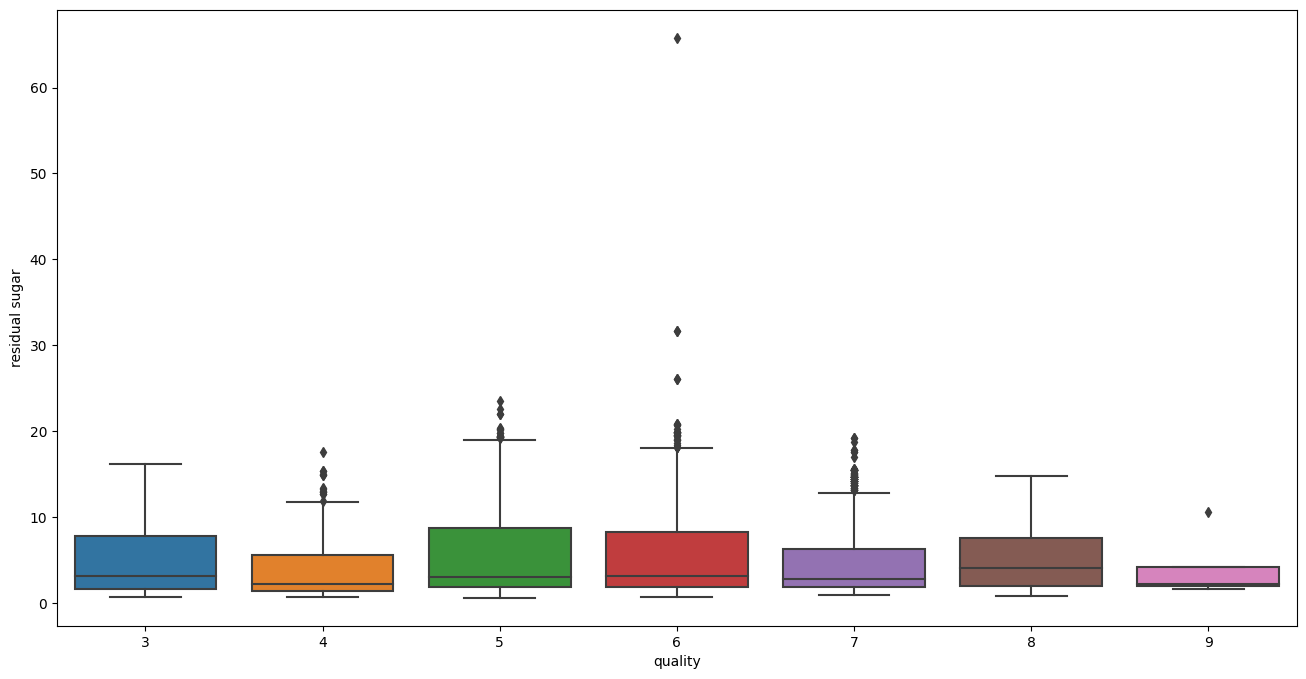

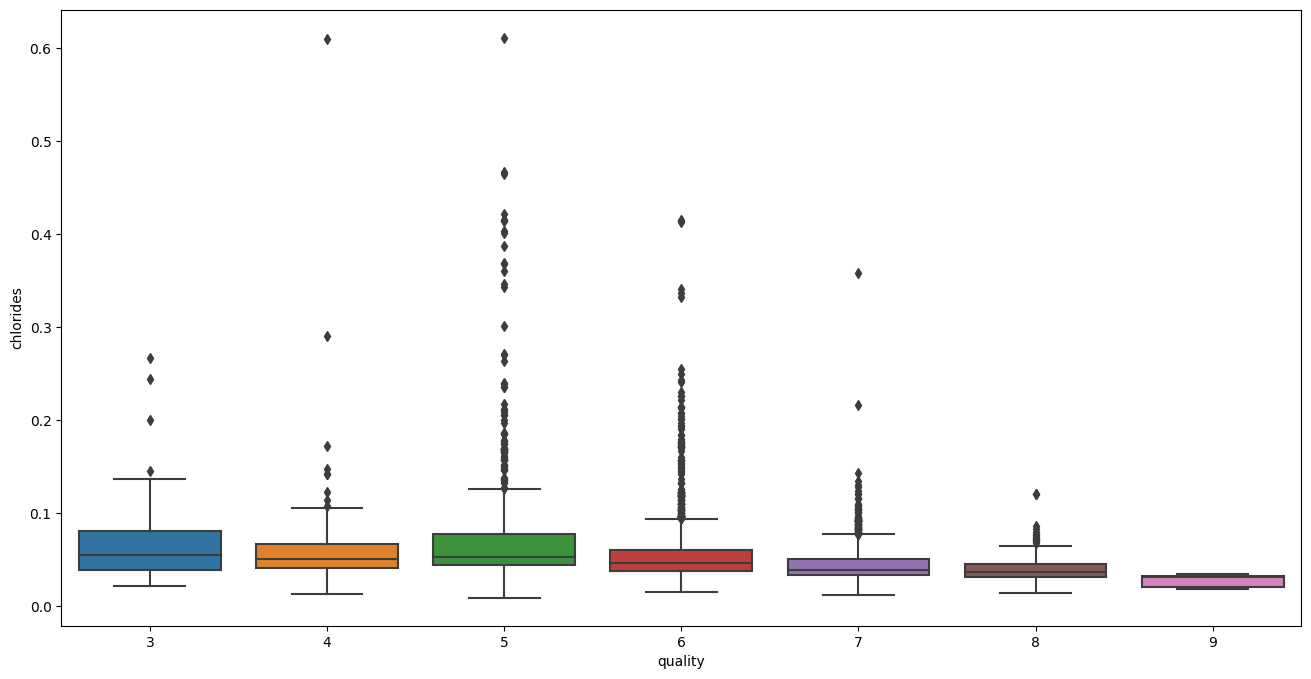

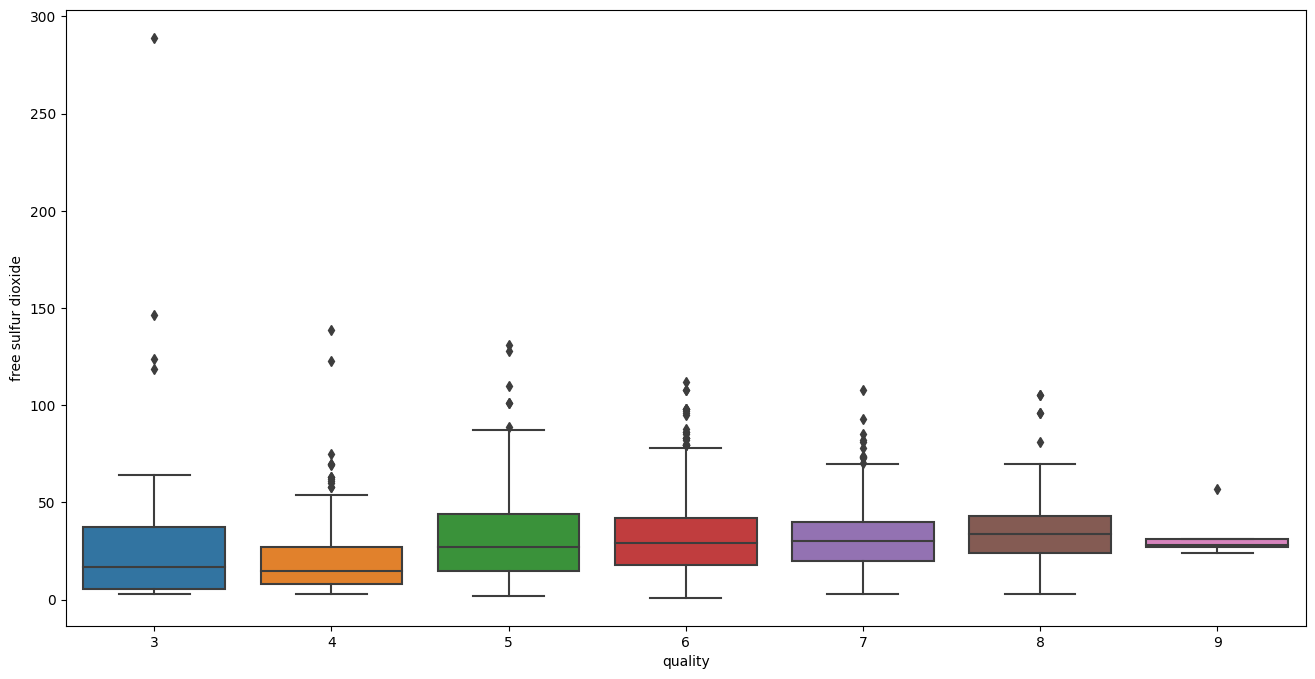

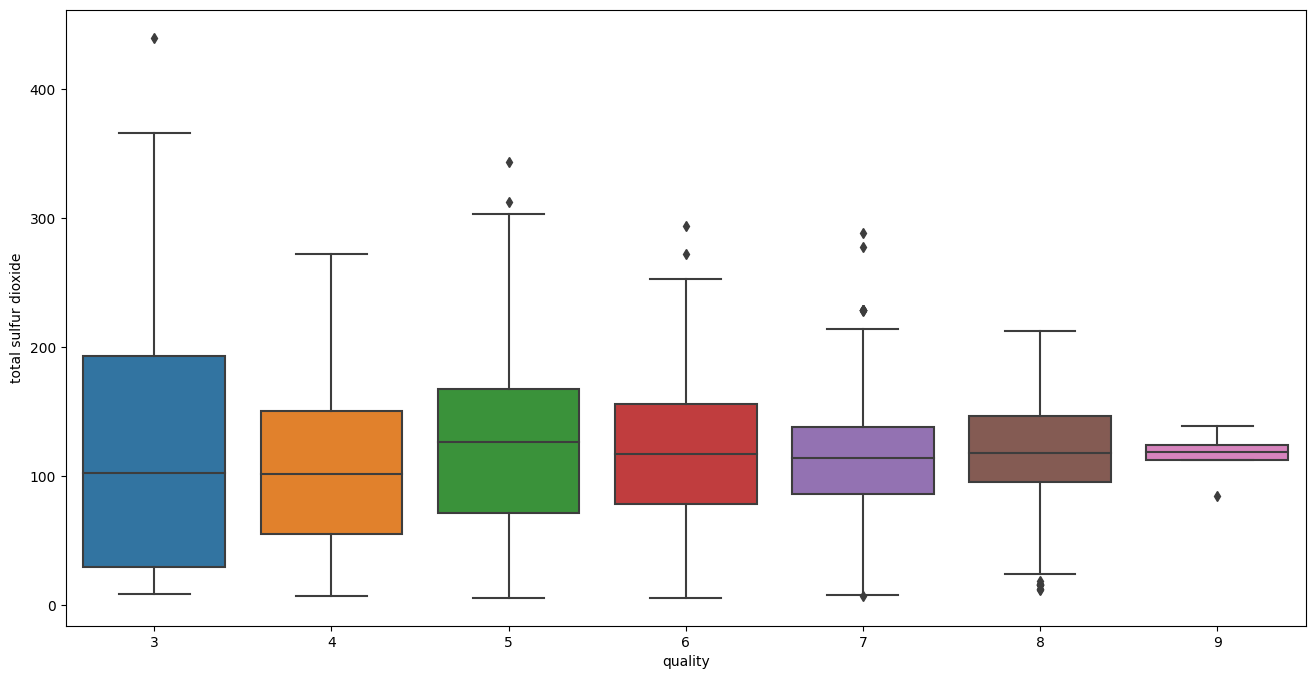

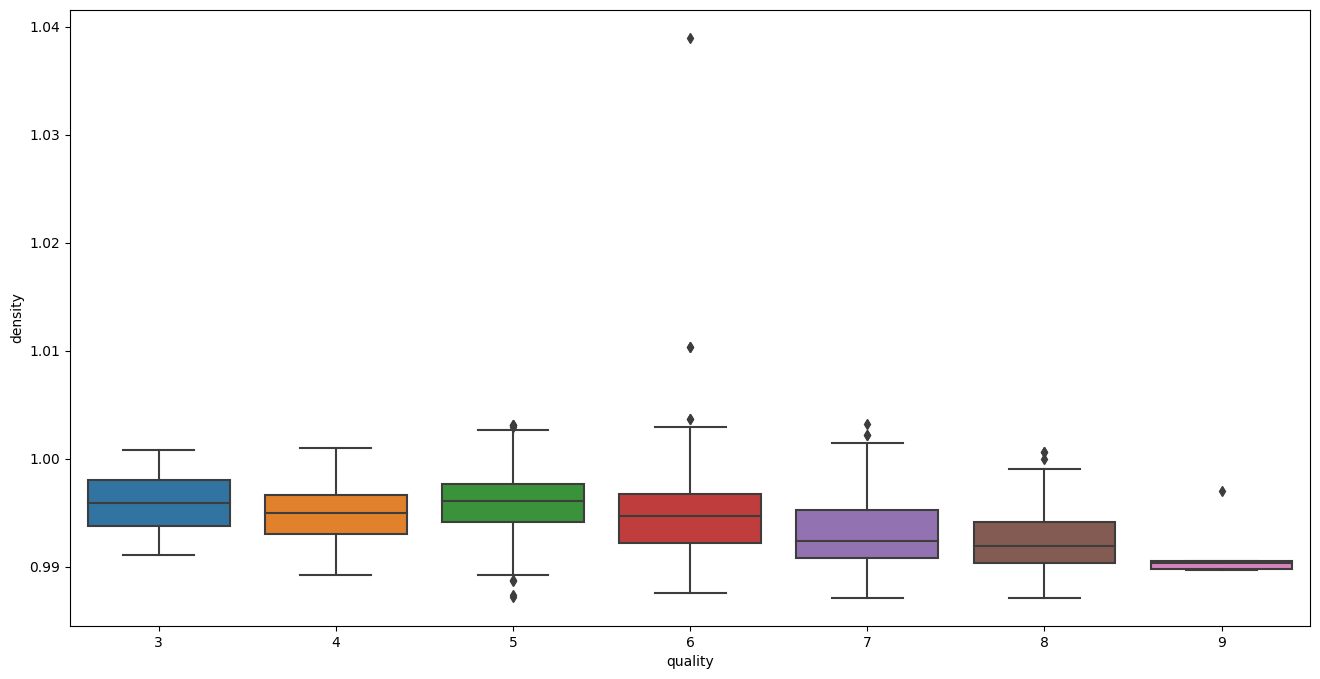

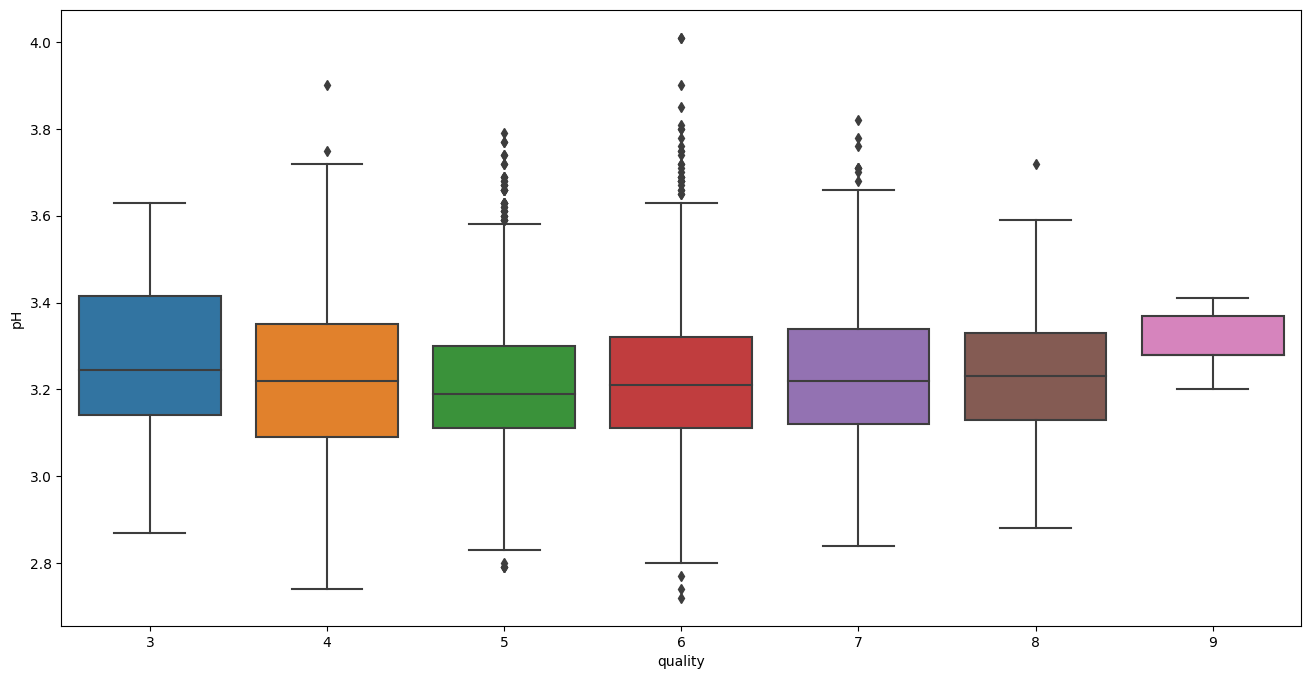

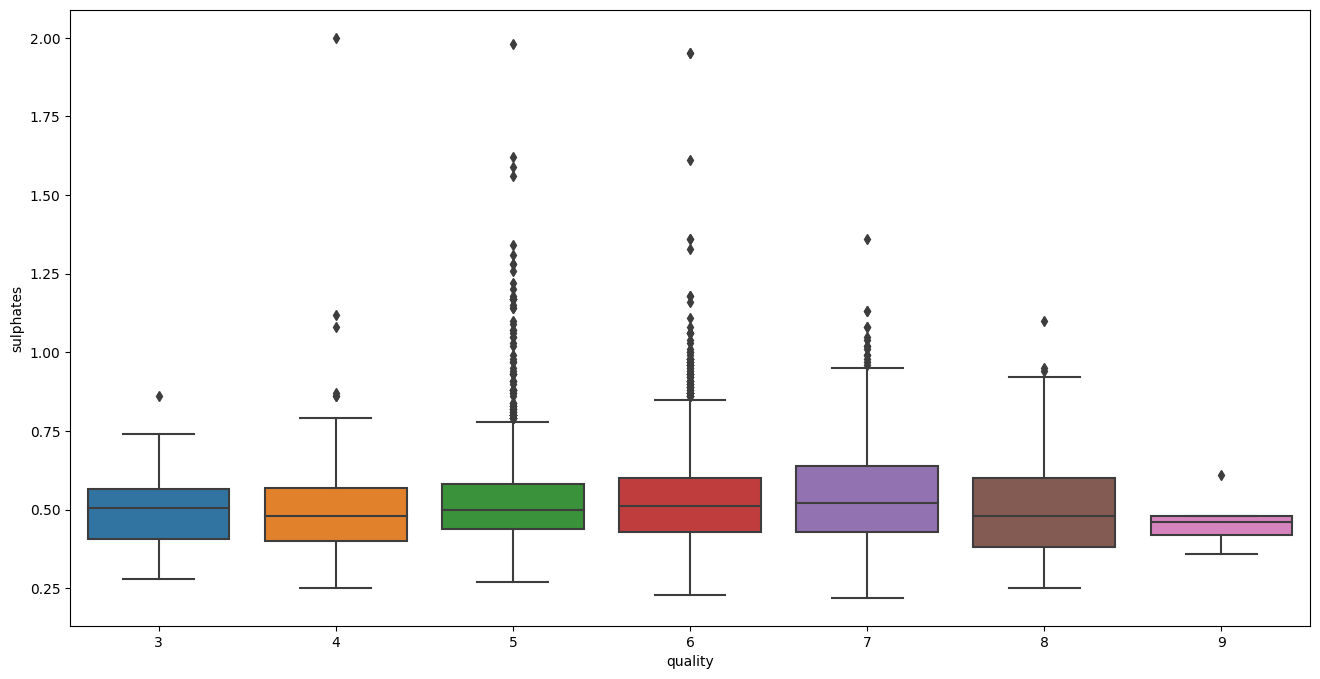

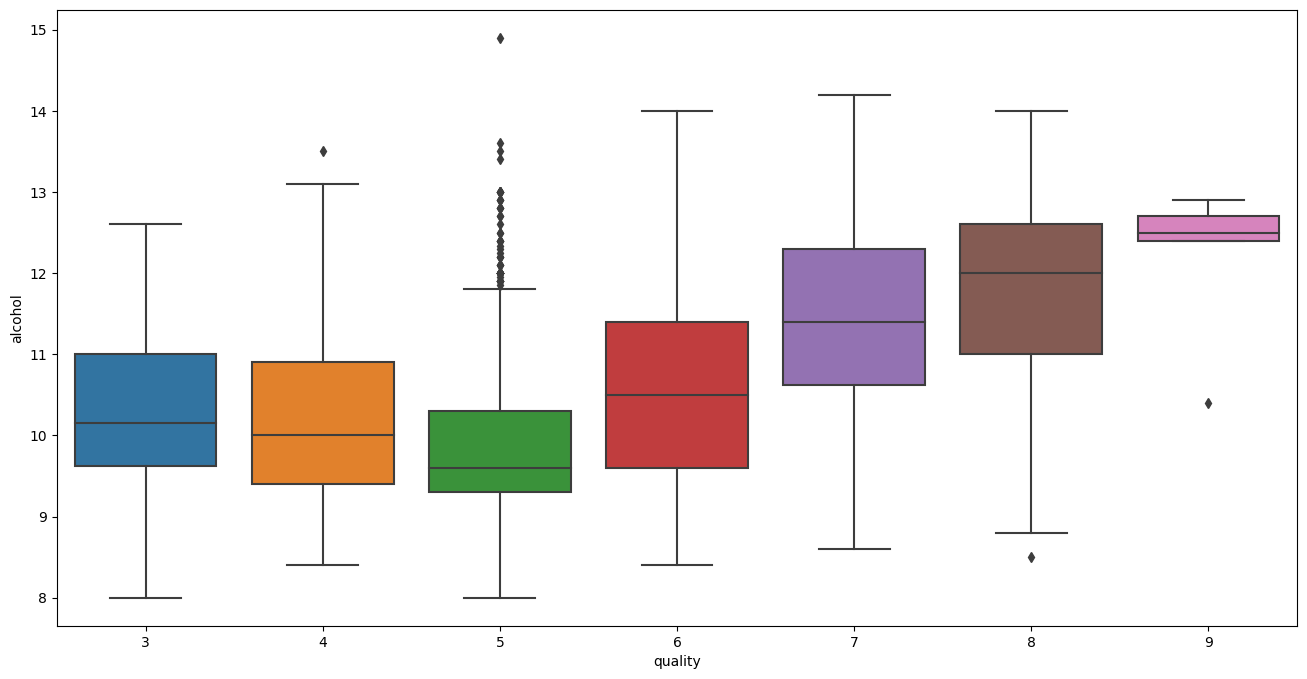

<Figure size 640x480 with 0 Axes>

In [ ]:
for i, col in enumerate(columns_to_plot):
    plot_boxplot(df, var=col, target='quality')

plt.tight_layout()
plt.show()

Выводы:

Большинство вин в представленном наборе данных имеют среднее качество. Самые распространенные оценки составляют 5-6.

Качество вина положительно коррелирует с определенными характеристиками, такими как процент алкоголя. Это означает, что вина с более высоким процентом алкоголя обычно имеют лучшее качество.

При анализе данных было обнаружено, что в случае пропущенных значений их можно заменить средним значением или удалить. Кроме того, набор данных относительно чист, то есть в нем нет большого количества пропущенных значений или ошибок.

Некоторые характеристики, такие как содержание сахара и диоксид серы, имеют асимметричное распределение. Это может указывать на наличие отклонений от нормального распределения в данных.

Были выявлены выбросы в переменных, связанных с ошибками или естественными аномалиями.

Некоторые характеристики демонстрируют значительную взаимосвязь между собой, что может указывать на наличие мультиколлинеарности. При использовании регрессионных моделей необходимо учитывать этот факт.

In [ ]:
df_new = df.dropna()
df_new = df_new.drop('total sulfur dioxide', axis = 1)

le = LabelEncoder()
df_new["type"] = le.fit_transform(df_new["type"])

x = df_new.iloc[:,:-1].values
y = df_new.iloc[:,[-1]].values

ros = RandomOverSampler()
x_data,y_data = ros.fit_resample(x,y)

ss = StandardScaler()
x_scaled = ss.fit_transform(x_data)

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_data,test_size=0.2,random_state=42)